# Fit Gamma factor

> *This notebook estimates the gamma factor from a set of 5 μs-ALEX smFRET measurements.*

## What this notebook does?

According to [Lee 2005](http://dx.doi.org/10.1529/biophysj.104.054114) ([PDF](http://www.chem.ucla.edu/~michalet/papers/BJ2005.pdf), [SI PDF](http://www.chem.ucla.edu/~michalet/papers/BJ2005SI.pdf)), we estimate the $\gamma$-factor 
from Proximity Ratio (PR) and S values (with background, leakage and direct excitation correction) 
for a set of 5 μs-ALEX measurements.

The PR and S values are computed by the template notebook:

- [usALEX-5samples-PR-leakage-dir-ex-all-ph](usALEX-5samples-PR-leakage-dir-ex-all-ph.ipynb)

which is executed for each sample using [usALEX-Batch](usALEX-Batch.ipynb).

From [Lee 2005](http://dx.doi.org/10.1529/biophysj.104.054114) (equation 20), the following linear relation holds:

$$\frac{1}{S} = \Omega + \Sigma \cdot E_{PR}$$

Once $\Omega$ and $\Sigma$ are fitted, we can compute the $\gamma$-factor as ([equation 22](http://www.sciencedirect.com/science/article/pii/S0006349505733464#eq22)):

$$\gamma = (\Omega-1)/(\Omega + \Sigma-1)$$

## Import libraries

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import lmfit
from scipy.stats import linregress

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Computation

This notebook read data from the file:

In [2]:
data_file = 'results/usALEX-5samples-PR-leakage-dir-ex-all-ph.txt'

In [3]:
data = pd.read_csv(data_file, sep="\s+").set_index('sample')
data

,n_bursts_all,n_bursts_do,n_bursts_fret,E_kde_w,E_gauss_w,E_gauss_w_sig,E_gauss_w_err,S_kde,S_gauss,S_gauss_sig,S_gauss_err,E_pr_do_kde,nt_mean
sample,,,,,,,,,,,,,
7d,1167,582,542,0.9302,0.925533,0.059437,0.002553,0.5524,0.550366,0.099261,0.004264,0.0014,22.198900
12d,1303,329,944,0.7430,0.731184,0.092252,0.003003,0.5768,0.556622,0.105519,0.003434,0.0164,21.841737
17d,2482,462,1957,0.4310,0.426150,0.114118,0.002580,0.5436,0.536833,0.113025,0.002555,0.0126,21.054439
22d,2047,319,1666,0.1788,0.182669,0.078314,0.001919,0.5426,0.543185,0.114819,0.002813,0.0008,22.918132
27d,786,160,584,0.0834,0.084095,0.070112,0.002901,0.5150,0.556142,0.115363,0.004774,-0.0068,16.980705


In [4]:
data[['E_gauss_w', 'E_kde_w']]

,E_gauss_w,E_kde_w
sample,,
7d,0.925533,0.9302
12d,0.731184,0.7430
17d,0.426150,0.4310
22d,0.182669,0.1788
27d,0.084095,0.0834


In [5]:
E_ref, S_ref = data.E_gauss_w, data.S_gauss

In [6]:
res = linregress(E_ref, 1/S_ref)
slope, intercept, r_val, p_val, stderr = res

For more info see [`scipy.stats.linearregress`](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.linregress.html).

In [7]:
Sigma = slope 
Sigma

-0.013669136927578042

In [8]:
Omega = intercept
Omega

1.8295024258354751

[Pearson correlation coefficient](http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient):

In [9]:
r_val

-0.17077548958177707

[Coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$:

In [10]:
r_val**2

0.029164267841895651

P-value (to test the null hypothesis that the slope is zero):

In [11]:
p_val

0.78362346968306229

Gamma computed from the previous fitted values:

In [12]:
gamma = (Omega - 1)/(Omega + Sigma - 1)
gamma

1.0167548163496443

In [13]:
with open('results/usALEX - gamma factor - all-ph.txt', 'w') as f:
    f.write(str(gamma))

#Fit plot

In [14]:
%matplotlib inline
from matplotlib.pyplot import *

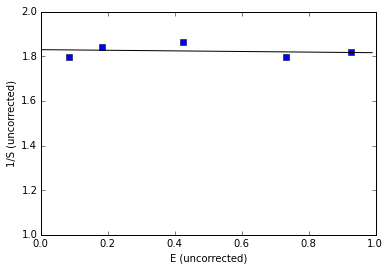

In [15]:
plot(E_ref, 1/S_ref, 's')
x = np.arange(0, 1, 0.01)
plot(x, intercept + slope*x, 'k')
ylim(1, 2)
xlabel('E (uncorrected)')
ylabel('1/S (uncorrected)')